In [2]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf


In [3]:
from tensorflow.python.client import device_lib

# List and display the local devices available (CPU, GPU, etc.)
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5864334166865092084
xla_global_id: -1
]


In [4]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


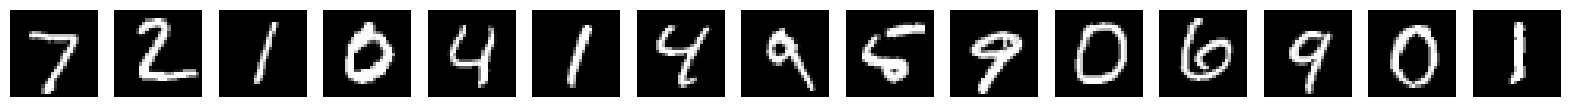

In [5]:
# displaying the dataset
import matplotlib.pyplot as plt

n = 15

plt.figure(figsize= (20,5))

for v in range(n):
    # create a subplot withen the figure
    pic = plt.subplot(2,n,v+1)
#display the original image
    plt.imshow(x_test[v].reshape(28,28),cmap = 'gray')
    plt.axis('off')

In [6]:
# displaying the shapes of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
# Reshaping the data
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
#min - max scalling
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
#this will convert the image pixls form range(0,.....,255) to range(0,.....,1)

In [9]:
# one-hot encoding
from keras.utils import to_categorical

no_classes = 10
y_train = to_categorical(y_train , no_classes)

y_test = to_categorical(y_test , no_classes)



In [10]:
#seeeing the updated shapes of training and testing data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [11]:
#building the CNN

from keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.layers import Conv2D , MaxPooling2D

img_rows,img_cols,channels = 28,28,1

filters = [6,32,80,120]

classes = 10

In [12]:
#creating a model
model = Sequential() #Sequential is a container to store layers
model.add(Conv2D(filters[0],(3,3),padding = 'same', activation = 'relu',input_shape = (img_rows,img_cols , channels))) # input layer

model.add(MaxPooling2D(pool_size = (2,2))) # for reducing image size layer 1

model.add(Conv2D(filters[1],(2,2),padding = 'same', activation = 'relu')) # layer 2

model.add(MaxPooling2D(pool_size = (2,2))) # layer 3

model.add(Conv2D(filters[2],(2,2),padding = 'same' , activation = 'relu')) #layer 4

model.add(MaxPooling2D(pool_size = (2,2))) #layer 5

model.add(Conv2D(filters[3],(2,2),padding = 'same', activation = 'relu')) #layer 6

model.add(MaxPooling2D(pool_size = (2,2))) #layer 7

model.add(Flatten()) #layer 8 to convert the 2D image into 1D image

model.add(Dense(64 , activation = 'relu')) #layer 9

model.add(Dense(classes , activation = 'softmax')) # output layer

model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'], optimizer = 'sgd')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 80)            │          10,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 120)           │          38,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 120)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,094 (226.93 KB)

 Trainable params: 58,094 (226.93 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(x_train,y_train , validation_split = 0.2, epochs = 15 , batch_size = 64 , verbose = 1 )

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.1409 - loss: 2.2712 - val_accuracy: 0.6538 - val_loss: 1.4671
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.7155 - loss: 0.9415 - val_accuracy: 0.9279 - val_loss: 0.2514
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9190 - loss: 0.2604 - val_accuracy: 0.9446 - val_loss: 0.1765
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9456 - loss: 0.1757 - val_accuracy: 0.9608 - val_loss: 0.1296
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 0.9573 - loss: 0.1351 - val_accuracy: 0.9654 - val_loss: 0.1113
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9648 - loss: 0.1126 - val_accuracy: 0.9636 - val_loss: 0.1205
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9692 - loss: 0.0988 - val_accuracy: 0.9728 - val_loss: 0.0895
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9732 - loss: 0.0869 - 

In [23]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_probabilities = model.predict(x_test)

print(y_pred_probabilities)

y_pred = np.argmax(y_pred_probabilities, axis=1)


print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
[[6.7121999e-07 5.4456155e-05 1.5883785e-04 ... 9.9935609e-01
  9.4221457e-07 2.8882237e-06]
 [9.9228288e-05 4.9428351e-04 9.9939620e-01 ... 5.9610445e-09
  2.5938189e-06 2.1722322e-08]
 [1.4702856e-05 9.9979901e-01 3.4582631e-06 ... 7.1563459e-06
  2.5883850e-05 6.4150295e-06]
 ...
 [8.0526434e-07 1.9147701e-06 4.0027817e-09 ... 2.4404764e-08
  1.0489634e-06 2.7383323e-05]
 [3.3833153e-08 7.0344912e-09 4.3020263e-09 ... 1.2526483e-10
  3.5825069e-03 1.6214186e-06]
 [3.9227380e-06 6.6696617e-07 5.9786153e-06 ... 1.2977926e-10
  1.5191506e-05 4.2502002e-08]]
[7 2 1 ... 4 5 6]


In [31]:
# Select the first 20 samples from the test set for visualization
x_valid_img = x_test[210:230]
actual_labels = y_test[210:230]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(x_valid_img)
y_pred = np.argmax(y_pred_probs_valid, axis=1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


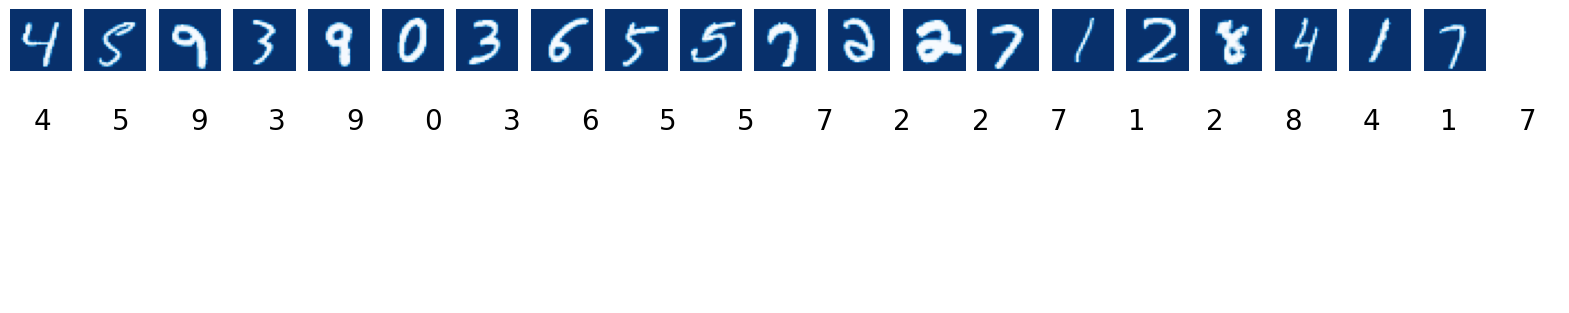

In [65]:
#  Set up a figure to display images
n = len(x_valid_img)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    #               rows,columns,index(behaive like margin)
    ax = plt.subplot(3, n+1, i + 1)
    plt.imshow(x_valid_img[i].reshape(28, 28), cmap = 'Blues_r')
    plt.axis('off')

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n )
    #margin  left , bottom
    plt.text(0.5, 1.3, str(predicted_digit), fontsize=20, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()